In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/refs/heads/main/global_Power_plant_database.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#checking the Total No of Rows and Columns
df.shape

(908, 25)

In [5]:
#checking for null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [6]:
"""In this dataset contains total 908 rows while checking null values we can see in columns other_fuel2-:907,other_fuel1:-709
other_fuel3:-908,wepp_id:-908,estimated_generation_gwh:-908 values are null. therefore we are dropping this columns.If we
fill these values then prediction will not correct"""

'In this dataset contains total 908 rows while checking null values we can see in columns other_fuel2-:907,other_fuel1:-709\nother_fuel3:-908,wepp_id:-908,estimated_generation_gwh:-908 values are null. therefore we are dropping this columns.If we\nfill these values then prediction will not correct'

In [7]:
df.drop(['other_fuel1','other_fuel2','other_fuel3','estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [8]:
#again checking for null values
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [9]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source     object
dtype: object

In [10]:
#Fill null values Using mean method in contineous data 
for i in df.columns:
    if df.dtypes[i]=="float64":
        df[i]=df[i].fillna(df[i].mean())

In [11]:
#again checking null values
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year          0
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source    458
dtype: int64

In [12]:
#Remove Null values using mode method for categorical data
for i in df.columns:
    if df.dtypes[i]=="object":
        df[i]=df[i].fillna(df[i].mode()[0])

In [13]:
#again checking null values
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

In [14]:
"""Now No Null values"""

'Now No Null values'

In [15]:
#checking for duplicated value
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                908 non-null    float64
 6   longitude               908 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   commissioning_year      908 non-null    float64
 9   owner                   908 non-null    object 
 10  source                  908 non-null    object 
 11  url                     908 non-null    object 
 12  geolocation_source      908 non-null    object 
 13  year_of_capacity_data   908 non-null    float64
 14  generation_gwh_2013     908 non-null    fl

In [17]:
"""In this dataset 2 types of data are present float64 and object with memory usage."""

'In this dataset 2 types of data are present float64 and object with memory usage.'

In [18]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

country
IND    908
Name: count, dtype: int64


country_long
India    908
Name: count, dtype: int64


name
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADAMPARI                  1
KADANA                     1
KADRA                      1
KAHALGAON                  1
iEnergy Theni Wind Farm    1
Name: count, Length: 908, dtype: int64


gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000166    1
IND0000167    1
IND0000168    1
IND0000169    1
WRI1026761    1
Name: count, Length: 908, dtype: int64


capacity_mw
5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
645.0      1
41.4       1
17.5       1
445.0      1
106.6      1
Name: count, Length: 365, dtype: int64


latitude
21.196189    46
19.000400     3
24.191700     3
31.268000     2
14.235200     2
             ..
22.755

In [19]:
#checking no of unique values in each col
df.nunique().to_frame("No of unique values")

,No of unique values
country,1
country_long,1
name,908
gppd_idnr,908
capacity_mw,365
latitude,838
longitude,829
primary_fuel,8
commissioning_year,74
owner,280


In [20]:
# removing column year_of_capacity_data,country,country_long,generation_data_source because it having one unique value
df.drop(['year_of_capacity_data','country','country_long','generation_data_source'],axis=1,inplace=True)

In [21]:
df.shape

(908, 16)

In [22]:
#statistical summary of numerical col
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.781201,12.994825,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1996.876894,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.978950,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,2003.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: count, dtype: int64


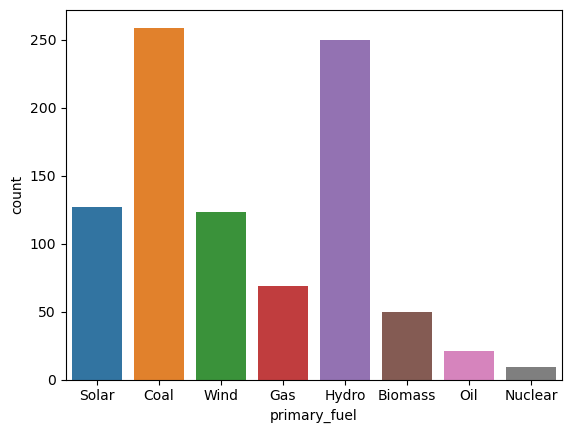

In [23]:
#DATA VISUALIZATION
#visualized the Primary fuel
ax=sns.countplot(x='primary_fuel',data=df)
print(df['primary_fuel'].value_counts())

In [24]:
"""Here we can see Coal and Hydro primary fuel is more used. Oil and Nuclear is very less in used"""

'Here we can see Coal and Hydro primary fuel is more used. Oil and Nuclear is very less in used'

<Axes: xlabel='primary_fuel', ylabel='capacity_mw'>

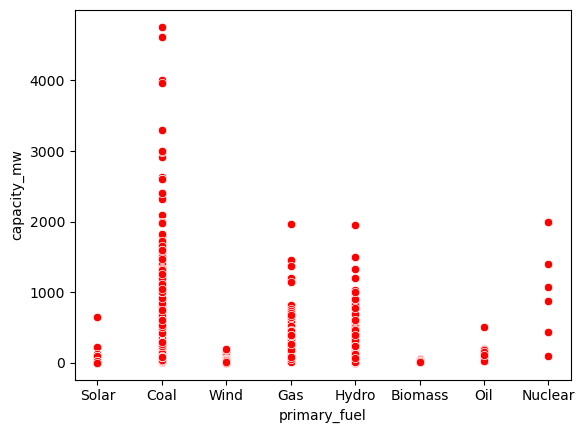

In [25]:
#visualized the capacity of primary fuel
sns.scatterplot(x='primary_fuel',y='capacity_mw',data=df,color='r')

In [26]:
"""From above graph capacity of coal is higher than gas and hydro. wind,biomass oil have the least capacity. """

'From above graph capacity of coal is higher than gas and hydro. wind,biomass oil have the least capacity. '

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2013'>

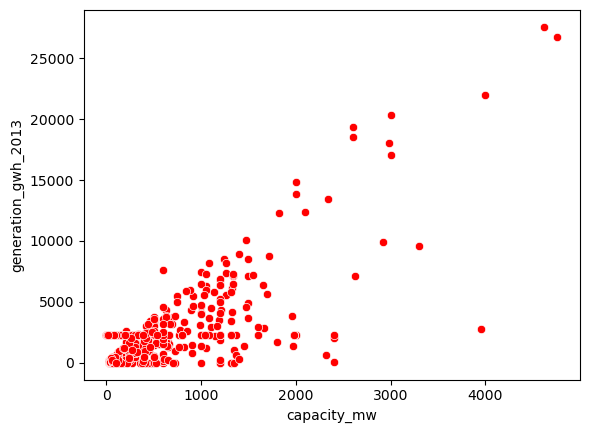

In [27]:
#visualized the capacity in generation_gwh_2013
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df,color='r')

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2014'>

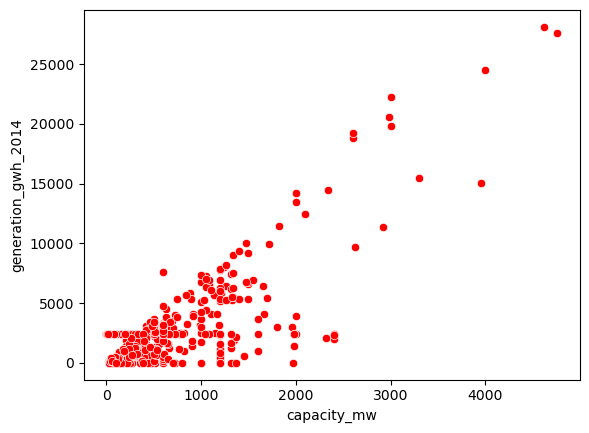

In [28]:
#visualized the capacity in generation_gwh_2014
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df,color='r')

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2015'>

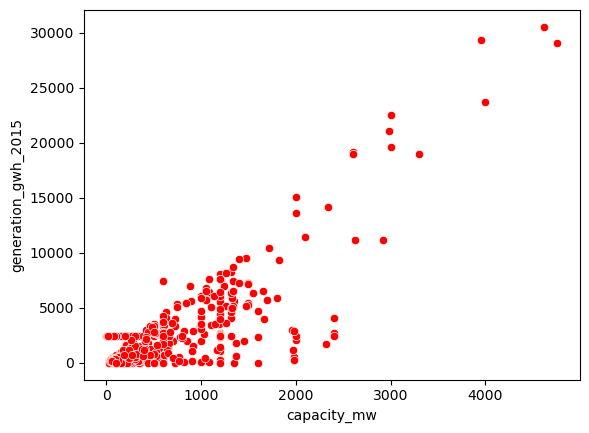

In [29]:
#visualized the capacity in generation_gwh_2015
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df,color='r')

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2016'>

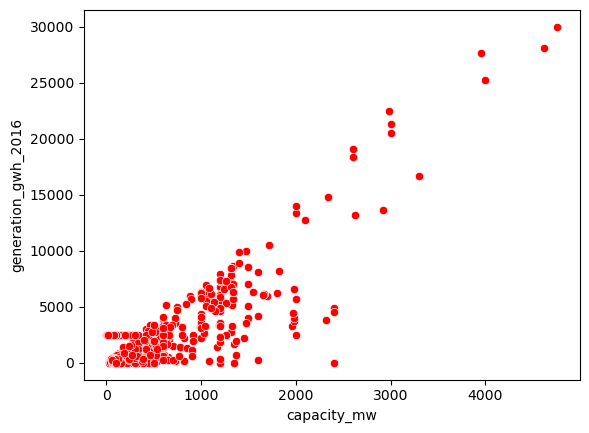

In [30]:
#visualized the capacity in generation_gwh_2016
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df,color='r')

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2017'>

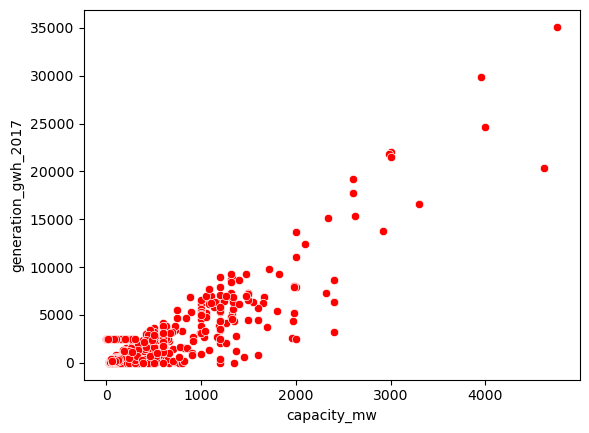

In [31]:
#visualized the capacity in generation_gwh_2017
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df,color='r')

In [32]:
"""Here we can see generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 are 
linearly related to capacity_mw i.e. target column."""

'Here we can see generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 are \nlinearly related to capacity_mw i.e. target column.'

In [33]:
#separating numerical and categorical columns

#checking for categorical column

cat=list(df.select_dtypes(include='object'))
print("Categorical columns: ",cat)
print("\n")

#checking for numerical columns
num=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num.append(i)
print("numerical columns: ",num)
print("\n")

Categorical columns:  ['name', 'gppd_idnr', 'primary_fuel', 'owner', 'source', 'url', 'geolocation_source']


numerical columns:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']




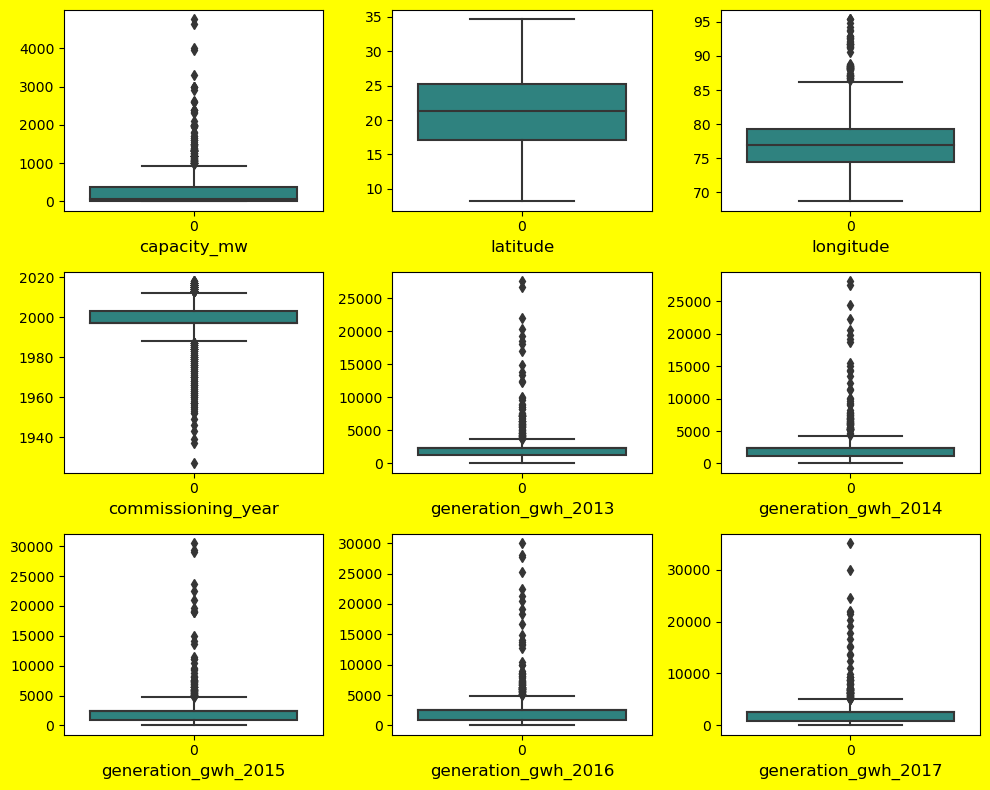

In [34]:
#checking the outliers using boxplot
plt.figure(figsize=(10,8),facecolor="Yellow")
plotnumber=1
for col in num:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],palette="viridis_r")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [35]:
"""Here only latitude have no outliers remaining all columns have outliers. using zscore and IQR technique we can remove 
outliers"""

'Here only latitude have no outliers remaining all columns have outliers. using zscore and IQR technique we can remove \noutliers'

In [36]:
from scipy.stats import zscore
z_score=zscore(df[['capacity_mw','longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [37]:
#after removing outliers
df.shape

(850, 16)

In [38]:
"""Dataset contains 850 rows with 16 columns"""

'Dataset contains 850 rows with 16 columns'

In [39]:
#encoding categorical cols using LabelEncoder

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=lab_enc.fit_transform(df[i].values.reshape(-1,1))
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,601,2.5,28.1839,73.2407,6,2011.000000,228,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,463,98.0,24.7663,74.6090,1,1996.876894,257,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,2,796,39.2,21.9038,69.3732,7,1996.876894,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,3,0,135.0,23.8712,91.3602,2,2004.000000,5,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,4,1,1800.0,21.9603,82.4091,1,2015.000000,5,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,845,440,1600.0,16.2949,77.3568,1,2016.000000,5,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,846,765,3.0,12.8932,78.1654,6,1996.876894,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,847,834,25.5,15.2758,75.5811,7,1996.876894,5,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,848,483,80.0,24.3500,73.7477,1,1996.876894,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


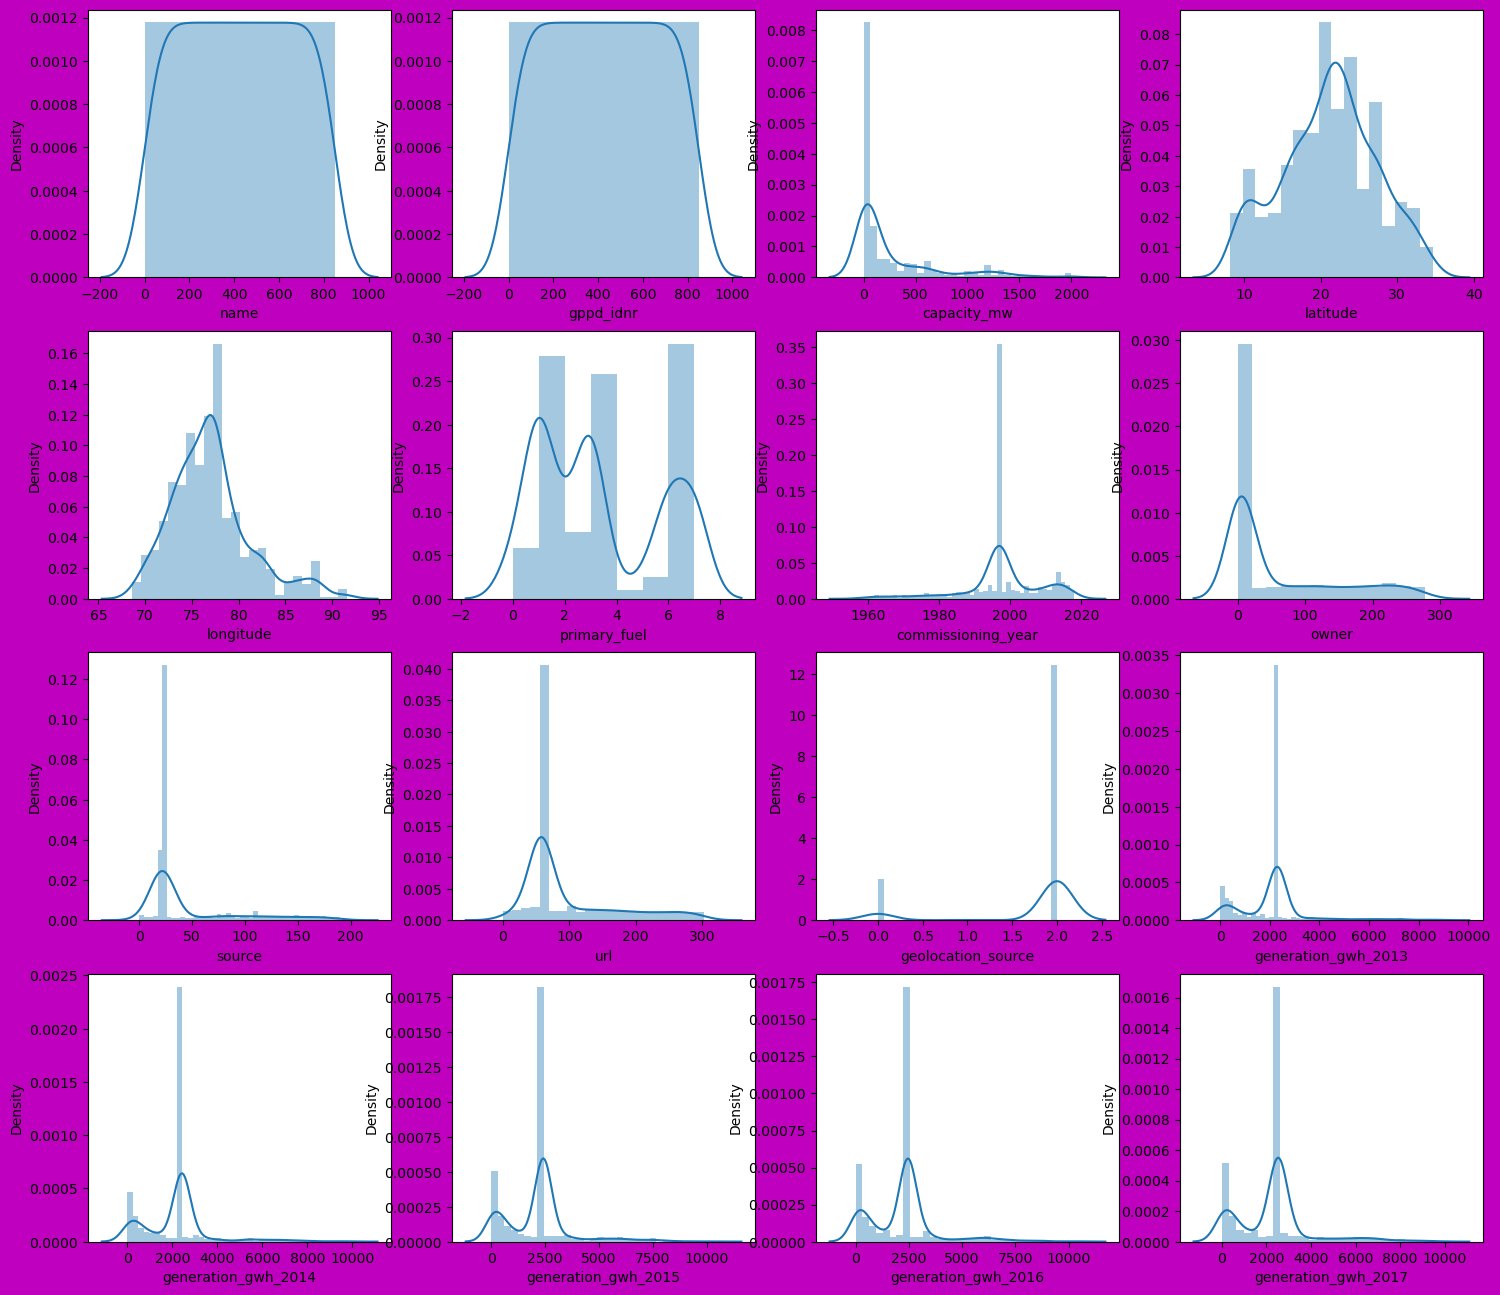

In [40]:
#Cheking For Skewness
#lets see how data is distributed for every column
plt.figure(figsize=(18,16),facecolor='m')
p=1
for col in df:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=10)
    p+=1
plt.show()

In [41]:
"""we can see almost in all columns data have rightly skewed.  """
df.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            1.986878
latitude              -0.107673
longitude              0.868587
primary_fuel           0.408911
commissioning_year    -0.860664
owner                  1.270284
source                 1.732385
url                    1.412782
geolocation_source    -2.064570
generation_gwh_2013    1.547085
generation_gwh_2014    1.455721
generation_gwh_2015    1.335529
generation_gwh_2016    1.359881
generation_gwh_2017    1.254465
dtype: float64

In [42]:
"""the col capacity_mw,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,    
generation_gwh_2017  have skewness in the data.since, owner,source,url,geolocation_source is 
categorical no need to remove skewness.since remaning all is contineous in natures, using cube root method we can
remove skewness"""

'the col capacity_mw,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,    \ngeneration_gwh_2017  have skewness in the data.since, owner,source,url,geolocation_source is \ncategorical no need to remove skewness.since remaning all is contineous in natures, using cube root method we can\nremove skewness'

In [43]:
#Using cube root method we can remove skewness
df['capacity_mw']=np.cbrt(df['capacity_mw'])
df['commissioning_year']=np.cbrt(df['commissioning_year'])
df['generation_gwh_2013']=np.cbrt(df['generation_gwh_2013'])
df['generation_gwh_2014']=np.cbrt(df['generation_gwh_2014'])
df['generation_gwh_2015']=np.cbrt(df['generation_gwh_2015'])
df['generation_gwh_2016']=np.cbrt(df['generation_gwh_2016'])
df['generation_gwh_2017']=np.cbrt(df['generation_gwh_2017'])

In [44]:
#again checking skewness
df.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            0.825511
latitude              -0.107673
longitude              0.868587
primary_fuel           0.408911
commissioning_year    -0.877470
owner                  1.270284
source                 1.732385
url                    1.412782
geolocation_source    -2.064570
generation_gwh_2013   -1.241398
generation_gwh_2014   -1.226969
generation_gwh_2015   -1.095900
generation_gwh_2016   -1.048196
generation_gwh_2017   -1.063044
dtype: float64

In [48]:
#dropping unnecessary columns
df.drop(['name','gppd_idnr','url','owner'],axis=1,inplace=True)

In [49]:
df.shape

(850, 12)

In [50]:
#checking the correlation between features and target
cor=df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.068195,0.337765,-0.493031,0.280586,-0.370681,0.378122,0.065412,0.047254,0.047556,0.087232,0.080487
latitude,0.068195,1.000000,-0.025470,-0.005636,0.103580,0.069594,-0.202528,0.034854,0.070214,0.058595,0.074135,0.047274
longitude,0.337765,-0.025470,1.000000,-0.382389,0.163227,-0.236716,0.267378,-0.103885,-0.132403,-0.157269,-0.106799,-0.119570
primary_fuel,-0.493031,-0.005636,-0.382389,1.000000,-0.144751,0.037476,-0.477885,0.066661,0.081938,0.084379,0.068901,0.085082
commissioning_year,0.280586,0.103580,0.163227,-0.144751,1.000000,-0.010903,0.020236,0.081284,0.088384,0.106720,0.154384,0.112206
source,-0.370681,0.069594,-0.236716,0.037476,-0.010903,1.000000,-0.497774,0.188688,0.198053,0.210396,0.211253,0.210372
geolocation_source,0.378122,-0.202528,0.267378,-0.477885,0.020236,-0.497774,1.000000,-0.151274,-0.158783,-0.168679,-0.169366,-0.168660
generation_gwh_2013,0.065412,0.034854,-0.103885,0.066661,0.081284,0.188688,-0.151274,1.000000,0.898483,0.793911,0.775076,0.703625
generation_gwh_2014,0.047254,0.070214,-0.132403,0.081938,0.088384,0.198053,-0.158783,0.898483,1.000000,0.835095,0.799415,0.717494
generation_gwh_2015,0.047556,0.058595,-0.157269,0.084379,0.106720,0.210396,-0.168679,0.793911,0.835095,1.000000,0.897826,0.775937


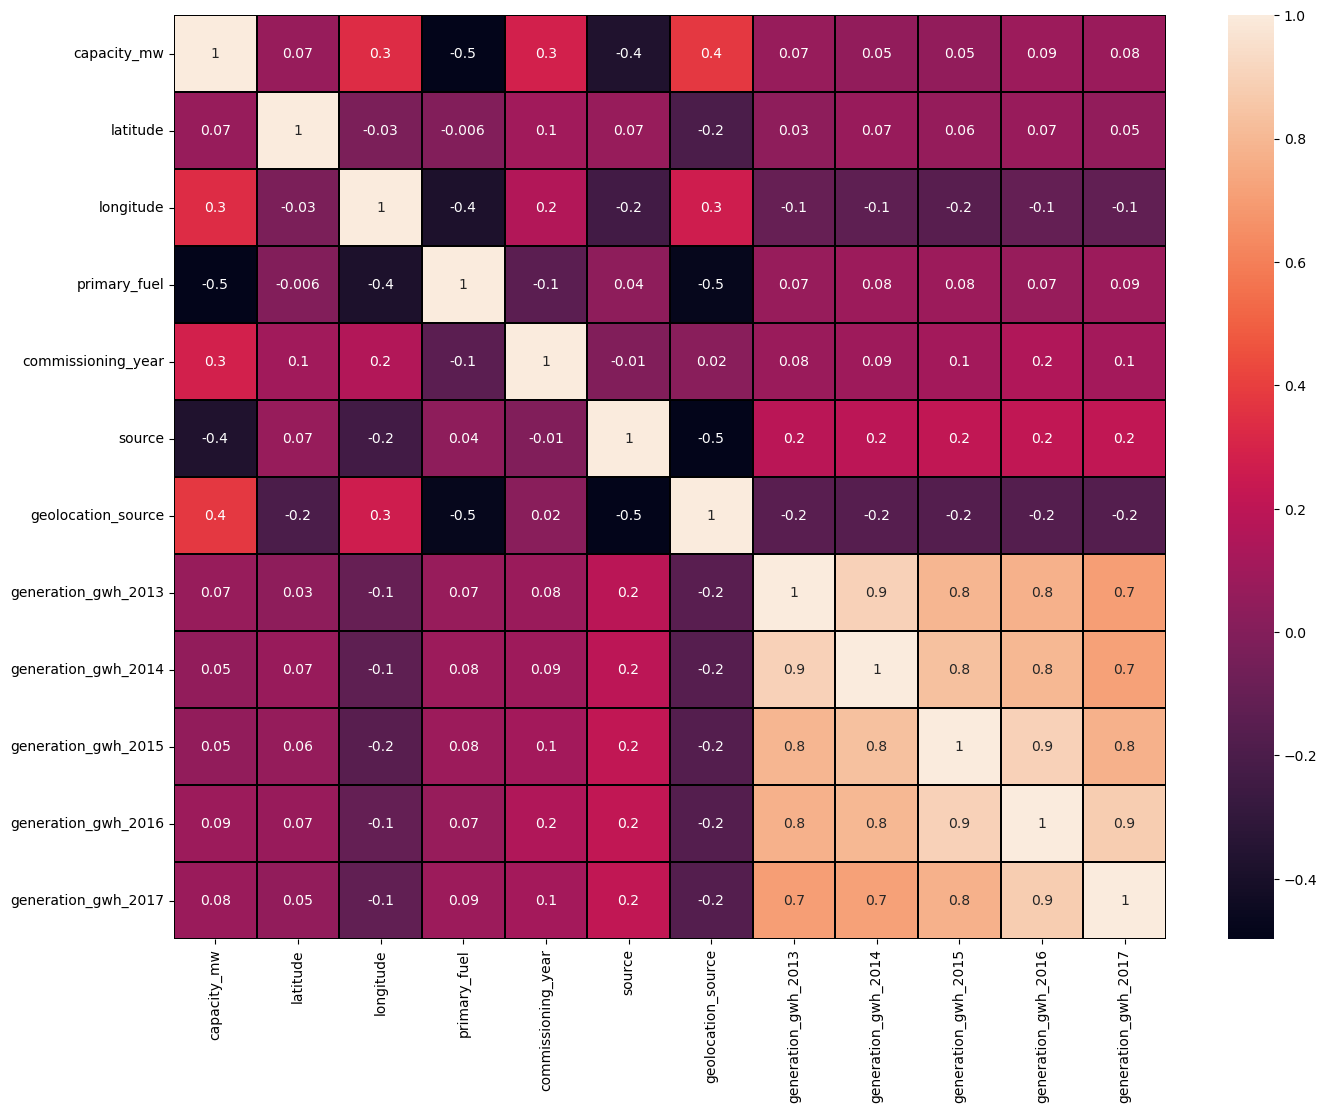

In [51]:
#visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),linewidths=0.2,fmt=".1g",linecolor="black",annot=True)
plt.yticks(rotation=0);
plt.show()

In [52]:
"""From above observation we can see generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,
\ngeneration_gwh_2017, latitude are positively related to target variable i.e capacity_mw."""

'From above observation we can see generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,\ngeneration_gwh_2017, latitude are positively related to target variable i.e capacity_mw.'

In [53]:
#We can observe the positive and negative correlated features with the target
cor['capacity_mw'].sort_values(ascending = False)

capacity_mw            1.000000
geolocation_source     0.378122
longitude              0.337765
commissioning_year     0.280586
generation_gwh_2016    0.087232
generation_gwh_2017    0.080487
latitude               0.068195
generation_gwh_2013    0.065412
generation_gwh_2015    0.047556
generation_gwh_2014    0.047254
source                -0.370681
primary_fuel          -0.493031
Name: capacity_mw, dtype: float64

In [54]:
#separating features and label for the first Target Variable 'capacity_mw'
x=df.drop("capacity_mw",axis=1)
y=df["capacity_mw"]

In [55]:
#Feature Scaling using Standard Scalarization
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.157754,-0.892193,1.172942,1.182436,1.396744,-1.035536,0.371295,0.389724,0.414013,0.415699,0.413966
1,0.599221,-0.567093,-0.977620,-0.073182,2.819969,0.407424,0.371295,0.389724,0.414013,0.415699,0.413966
2,0.131408,-1.811087,1.603054,-0.073182,-0.530084,0.407424,0.371295,0.389724,0.414013,0.415699,0.413966
3,0.452937,3.412889,-0.547508,0.560837,-0.508188,0.407424,-0.875073,-0.847201,-0.532233,-0.495195,-0.712404
4,0.140642,1.286163,-0.977620,1.536988,-0.508188,0.407424,0.008288,0.654958,1.528785,1.570860,1.309148
...,...,...,...,...,...,...,...,...,...,...,...
845,-0.785245,0.085767,-0.977620,1.625553,-0.508188,0.407424,0.371295,0.389724,-2.548896,-1.303419,-0.527270
846,-1.341179,0.277886,1.172942,-0.073182,0.696079,-2.478495,0.371295,0.389724,0.414013,0.415699,0.413966
847,-0.951795,-0.336128,1.603054,-0.073182,-0.530084,0.407424,0.371295,0.389724,0.414013,0.415699,0.413966
848,0.531186,-0.771733,-0.977620,-0.073182,0.301955,0.407424,0.371295,0.389724,0.414013,0.415699,0.413966


In [56]:
#Checking Variance Inflation Factor(VIF)
#finding variance inflation factor in each scaled col 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.083245,latitude
1,1.289615,longitude
2,1.632952,primary_fuel
3,1.087443,commissioning_year
4,1.545830,source
5,1.965879,geolocation_source
6,5.515602,generation_gwh_2013
7,6.630594,generation_gwh_2014
8,6.634815,generation_gwh_2015
9,9.728428,generation_gwh_2016


In [57]:
"""Here we can see No multicolinarity issue. so we can proceed further."""

'Here we can see No multicolinarity issue. so we can proceed further.'

In [58]:
# .....FINDING BEST RANDOM STATE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [59]:
#creating train test split
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Maximum r2 score is ",maxAccu,"on Random state",maxRs)

Maximum r2 score is  0.5385649041139138 on Random state 107


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRs)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge

In [62]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)

print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_LR)))

R2_score: 0.5385649041139138
R2_score on training data: 41.36427727384678
Mean Absolute Error: 1.6866072388575575
Mean Squared Error: 4.183721444018586
Root Mean Squared Error: 1.2986944362926782


In [63]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)

print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_RFR)))

R2_score: 0.899596146478045
R2_score on training data: 97.07642664385806
Mean Absolute Error: 0.7104066013053579
Mean Squared Error: 0.9103376808286908
Root Mean Squared Error: 0.8428562162702236


In [64]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)

print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_lasso)))

R2_score: 0.12650196122576796
R2_score on training data: 12.046061893888538
Mean Absolute Error: 2.3521313010792304
Mean Squared Error: 7.919797407499551
Root Mean Squared Error: 1.533665967894975


In [65]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)

print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred_rd)))

R2_score: 0.538456765701999
R2_score on training data: 41.36406917760633
Mean Absolute Error: 1.6873228028582745
Mean Squared Error: 4.184701909086987
Root Mean Squared Error: 1.2989699006744824


In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.38958751 0.4548746  0.36667102 0.4645469  0.46875138]
0.4288862835202103
Difference between R2 score and cross validation score is : 10.967862059370347


In [71]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.82502441 0.85527937 0.76146401 0.84455156 0.85251637]
0.8277671436824268
Difference between R2 score and cross validation score is : 7.182900279561821


In [72]:
score2=cross_val_score(lasso,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_lasso)-score2.mean())*100)

[0.15727005 0.16832916 0.12744613 0.11554257 0.15722866]
0.14516331537272142
Difference between R2 score and cross validation score is : -1.8661354146953468


In [79]:
score4=cross_val_score(rd,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_test,pred_rd)-score4.mean())*100)

[0.41836407 0.47793564 0.40776408 0.47842794 0.47851719]
0.4522017858068727
Difference between R2 score and cross validation score is : 9.633662147767335


In [89]:
"""From the difference between both R2 score and cross validation score computed on R2 score we 
can conclude that RandomForestRegressor as our best fitting and best performing model"""

'From the difference between both R2 score and cross validation score computed on R2 score we \ncan conclude that RandomForestRegressor as our best fitting and best performing model'

In [76]:
#Hyper parameter tunning
from sklearn.model_selection import GridSearchCV

In [81]:
param = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

gscv=GridSearchCV(RFR,param_grid=param,n_jobs=-1, cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [82]:
gscv.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 30}

In [83]:
model=RandomForestRegressor(bootstrap=True,max_features='sqrt',n_estimators=30,min_samples_split=4)

In [84]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_absolute_error(y_test,pred)))

R2_score: 0.9105321465498669
Mean Absolute Error: 0.6835251901536409
Mean Squared Error: 0.8111835886926962
Root Mean Squared Error: 0.8267558225701473


In [85]:
import joblib
import pickle
filename='global_capacity.pkl'
pickle.dump(model,open(filename,'wb'))

In [86]:
loaded_model=pickle.load(open('global_capacity.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

91.05321465498669


In [88]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
Predicted,7.470474,2.520881,1.439978,10.920032,3.782133,5.271336,1.894204,2.02443,4.225415,6.573221,...,10.894801,9.117485,2.691268,7.446855,7.878259,3.294512,1.932391,3.002882,3.701607,2.883807
Original,7.663094,2.289428,1.000000,11.981453,2.924018,4.932424,1.709976,1.44225,4.641589,5.000000,...,10.000000,10.000000,3.489766,7.605905,9.654894,4.621387,2.466212,1.553616,2.714418,3.277285


In [90]:
"""Now Taking 'Primary_Fuel' as Target."""

"Now Taking 'Primary_Fuel' as Target."

In [91]:
#dividing data into x and y
#separating features and label
x=df.drop("primary_fuel",axis=1)
y=df["primary_fuel"]

In [92]:
#Feature Scaling using Standard Scalarization
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.169470,1.157754,-0.892193,1.182436,1.396744,-1.035536,0.371295,0.389724,0.414013,0.415699,0.413966
1,-0.082562,0.599221,-0.567093,-0.073182,2.819969,0.407424,0.371295,0.389724,0.414013,0.415699,0.413966
2,-0.487973,0.131408,-1.811087,-0.073182,-0.530084,0.407424,0.371295,0.389724,0.414013,0.415699,0.413966
3,0.091001,0.452937,3.412889,0.560837,-0.508188,0.407424,-0.875073,-0.847201,-0.532233,-0.495195,-0.712404
4,2.441230,0.140642,1.286163,1.536988,-0.508188,0.407424,0.008288,0.654958,1.528785,1.570860,1.309148
...,...,...,...,...,...,...,...,...,...,...,...
845,2.284759,-0.785245,0.085767,1.625553,-0.508188,0.407424,0.371295,0.389724,-2.548896,-1.303419,-0.527270
846,-1.141058,-1.341179,0.277886,-0.073182,0.696079,-2.478495,0.371295,0.389724,0.414013,0.415699,0.413966
847,-0.639527,-0.951795,-0.336128,-0.073182,-0.530084,0.407424,0.371295,0.389724,0.414013,0.415699,0.413966
848,-0.183316,0.531186,-0.771733,-0.073182,0.301955,0.407424,0.371295,0.389724,0.414013,0.415699,0.413966


In [93]:
#Checking Variance Inflation Factor(VIF)
#finding variance inflation factor in each scaled col 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.502684,capacity_mw
1,1.085610,latitude
2,1.213995,longitude
3,1.140922,commissioning_year
4,1.468879,source
5,1.529963,geolocation_source
6,5.526993,generation_gwh_2013
7,6.630295,generation_gwh_2014
8,6.634571,generation_gwh_2015
9,9.731566,generation_gwh_2016


In [94]:
"""By checking VIF values we can see the no multicollinarity problem. """

'By checking VIF values we can see the no multicollinarity problem. '

In [95]:
y.value_counts()

primary_fuel
1    237
3    219
6    126
7    123
2     65
0     50
5     21
4      9
Name: count, dtype: int64

In [96]:
"'Here we can see that the data is not balanced,SO we will balance the data using oversampling method'"

"'Here we can see that the data is not balanced,SO we will balance the data using oversampling method'"

In [97]:
#OVERSAMPLING
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [98]:
#checking value count of target col
y.value_counts()

primary_fuel
1    237
3    219
6    126
7    123
2     65
0     50
5     21
4      9
Name: count, dtype: int64

In [99]:
y1.value_counts()

primary_fuel
6    237
1    237
7    237
2    237
3    237
0    237
5    237
4    237
Name: count, dtype: int64

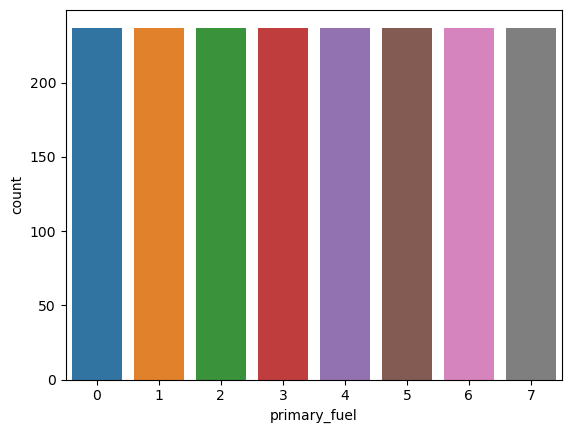

In [100]:
"""Now,we can see the data is balanced"""
#checking the count of primary_fuel
sns.countplot(data=df,x=y1)
plt.show()

In [101]:
#split into train test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=95)

In [102]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n----------------Train Result------------------\n")
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n----------------Test Result------------------\n")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        print('\n\n The Classification Report\n', classification_report(y_test,pred,digits=2))

In [103]:
random_clf=RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [104]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 100.00%

----------------Test Result------------------

Accuracy Score: 88.82%


 The Classification Report
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        55
           1       0.80      0.59      0.68        66
           2       0.83      0.77      0.80        57
           3       0.90      0.90      0.90        60
           4       0.90      0.97      0.93        59
           5       0.82      0.98      0.90        61
           6       1.00      1.00      1.00        57
           7       0.97      1.00      0.98        59

    accuracy                           0.89       474
   macro avg       0.89      0.89      0.89       474
weighted avg       0.89      0.89      0.88       474



In [105]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [106]:
metric_score(LR,x_train,x_test,y_train,y_test,train=True)
metric_score(LR,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 71.73%

----------------Test Result------------------

Accuracy Score: 69.20%


 The Classification Report
               precision    recall  f1-score   support

           0       0.57      0.80      0.67        55
           1       0.44      0.27      0.34        66
           2       0.63      0.39      0.48        57
           3       0.71      0.57      0.63        60
           4       0.76      0.98      0.86        59
           5       0.66      0.62      0.64        61
           6       1.00      1.00      1.00        57
           7       0.70      0.97      0.81        59

    accuracy                           0.69       474
   macro avg       0.68      0.70      0.68       474
weighted avg       0.68      0.69      0.67       474



In [107]:
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)

ExtraTreesClassifier()

In [108]:
metric_score(ETC,x_train,x_test,y_train,y_test,train=True)
metric_score(ETC,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 100.00%

----------------Test Result------------------

Accuracy Score: 91.56%


 The Classification Report
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        55
           1       0.88      0.64      0.74        66
           2       0.89      0.86      0.88        57
           3       0.88      0.93      0.90        60
           4       0.97      1.00      0.98        59
           5       0.91      1.00      0.95        61
           6       1.00      1.00      1.00        57
           7       0.91      1.00      0.95        59

    accuracy                           0.92       474
   macro avg       0.92      0.92      0.91       474
weighted avg       0.91      0.92      0.91       474



In [109]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [110]:
metric_score(svc,x_train,x_test,y_train,y_test,train=True)
metric_score(svc,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 83.19%

----------------Test Result------------------

Accuracy Score: 79.75%


 The Classification Report
               precision    recall  f1-score   support

           0       0.70      0.80      0.75        55
           1       0.71      0.41      0.52        66
           2       0.77      0.63      0.69        57
           3       0.88      0.73      0.80        60
           4       0.88      1.00      0.94        59
           5       0.78      0.85      0.81        61
           6       1.00      1.00      1.00        57
           7       0.69      1.00      0.82        59

    accuracy                           0.80       474
   macro avg       0.80      0.80      0.79       474
weighted avg       0.80      0.80      0.79       474



In [111]:
#..........CROSS VALIDATION SCORE........
from sklearn.model_selection import cross_val_score

In [112]:
#checking cv score for Random Forest Classifier
score=cross_val_score(random_clf,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=random_clf.predict(x_test)
acc_score1=accuracy_score(y_test,pred)
acc_score1

print("Difference between Accuracy Score and Cross Validation Score:",acc_score1-score.mean())

[0.83529412 0.85882353 0.87058824 0.82941176 0.85294118]
0.8494117647058823
Difference between Accuracy Score and Cross Validation Score: 0.03877388930255654


In [113]:
#checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=LR.predict(x_test)
acc_score2=accuracy_score(y_test,pred)
acc_score2

print("Difference between Accuracy Score and Cross Validation Score:",acc_score2-score.mean())

[0.71176471 0.72941176 0.68235294 0.71176471 0.72941176]
0.7129411764705883
Difference between Accuracy Score and Cross Validation Score: -0.020958054107719115


In [114]:
#checking cv score for Support Vector Machine
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=svc.predict(x_test)
acc_score3=accuracy_score(y_test,pred)
acc_score3

print("Difference between Accuracy Score and Cross Validation Score:",acc_score3-score.mean())

[0.74705882 0.77058824 0.7        0.75294118 0.74117647]
0.7423529411764707
Difference between Accuracy Score and Cross Validation Score: 0.05511541325390912


In [115]:
#checking cv score for Extra Trees Classifier
score=cross_val_score(ETC,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=ETC.predict(x_test)
acc_score4=accuracy_score(y_test,pred)
acc_score4

print("Difference between Accuracy Score and Cross Validation Score:",acc_score4-score.mean())

[0.8        0.84705882 0.86470588 0.81764706 0.86470588]
0.8388235294117645
Difference between Accuracy Score and Cross Validation Score: 0.07678828493422707


In [116]:
"""Random Forest Classifier is our best model as the difference between accuracy score and cross 
validation score is least

...............Random Forest Classifier IS OUR BEST MODEL......"""

'Random Forest Classifier is our best model as the difference between accuracy score and cross \nvalidation score is least\n\n...............Random Forest Classifier IS OUR BEST MODEL......'

In [117]:
param={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[50,80,150],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

gscv=GridSearchCV(random_clf,param_grid=param,n_jobs=-1, cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 80, 150], 'random_state': [10]})

In [118]:
gscv.best_params_

{'criterion': 'entropy',
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 10}

In [120]:
model=RandomForestClassifier(criterion='entropy',random_state=10,n_estimators=50,min_samples_split=2)

In [121]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.87341772151899


In [123]:
#saving model
import joblib
joblib.dump(model,"Global_primary_fuel.pkl")

['Global_primary_fuel.pkl']

In [125]:
model=joblib.load("Global_primary_fuel.pkl")
prediction=model.predict(x_test)
prediction

array([0, 1, 1, 1, 0, 5, 6, 0, 3, 2, 1, 6, 6, 1, 5, 4, 3, 3, 6, 0, 6, 4,
       4, 1, 3, 7, 5, 3, 5, 0, 3, 5, 5, 4, 3, 7, 5, 5, 5, 3, 5, 6, 6, 0,
       7, 2, 1, 6, 6, 0, 2, 7, 5, 0, 1, 7, 0, 0, 6, 4, 0, 6, 4, 0, 0, 3,
       6, 3, 3, 4, 4, 5, 0, 2, 3, 7, 3, 4, 2, 2, 4, 0, 5, 2, 1, 6, 7, 6,
       5, 4, 1, 4, 6, 0, 1, 5, 4, 2, 3, 4, 3, 5, 5, 1, 0, 7, 6, 0, 7, 3,
       5, 3, 2, 1, 3, 4, 6, 5, 5, 3, 2, 4, 5, 6, 0, 0, 3, 7, 2, 0, 6, 6,
       2, 3, 5, 7, 4, 0, 3, 3, 1, 5, 1, 7, 5, 5, 5, 7, 1, 0, 5, 2, 0, 3,
       7, 5, 4, 5, 4, 2, 0, 1, 4, 1, 4, 2, 7, 3, 7, 6, 3, 2, 7, 3, 0, 0,
       4, 6, 1, 6, 5, 0, 6, 5, 5, 3, 3, 4, 4, 1, 3, 6, 5, 1, 2, 2, 5, 2,
       1, 5, 7, 2, 3, 4, 2, 7, 1, 7, 2, 5, 1, 3, 2, 7, 4, 5, 4, 7, 2, 3,
       3, 4, 1, 0, 0, 1, 6, 2, 7, 4, 4, 4, 0, 2, 7, 2, 5, 0, 1, 6, 3, 6,
       1, 0, 2, 2, 4, 6, 6, 6, 1, 3, 1, 3, 4, 4, 3, 0, 2, 3, 1, 0, 4, 2,
       4, 7, 6, 6, 3, 1, 3, 7, 5, 5, 0, 6, 6, 0, 3, 5, 4, 1, 3, 4, 7, 7,
       0, 5, 3, 1, 5, 6, 5, 7, 5, 4, 1, 6, 7, 2, 3,

In [126]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
469,3,3
470,2,2
471,4,4
472,5,5


In [128]:
>>From the difference between both R2 score and cross validation score computed on R2 score we can conclude that 
  Random Forest Regressor is our best fitting and best performing model
>>The best score is 91.05% for prediction of capacity of Global power plant.

                                AND
>>Random Forest Classifier is our best model as the difference between accuracy score and cross 
  validation score is least.
>>The best accuracy score is 89.87% for prediction of Primary_fuel of Global Power Plant.